# Imports

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import math

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns # used for plot interactive graph.
import matplotlib.ticker as mtick
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Data Vizualization

In [56]:
df = pd.read_excel('C:\\Users\\NeryDragos\\PycharmProjects\\Song-Recommendation-System\\Data\\final_data_with_lyrics.xlsx')
second_df = pd.read_excel('C:\\Users\\NeryDragos\\PycharmProjects\\Song-Recommendation-System\\Data\\data.xlsx')
print(df.shape)
df.head()

(180220, 21)


,id,artist,name,popularity,preview,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,label,lyrics
0,2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,99,NaN,0.764,0.320,11,-7.209,1,...,0.8370,0.00000,0.0822,0.575,91.019,audio_features,189486,4.0,toplists,Here's to the ones that we got\nCheers to the ...
1,6WrI0LAC5M1Rw2MnX2ZvEg,Dua Lipa,Don't Start Now,95,https://p.scdn.co/mp3-preview/ed151225213380a4...,0.794,0.793,11,-4.521,0,...,0.0125,0.00000,0.0952,0.677,123.941,audio_features,183290,4.0,toplists,"If you don't wanna see me\nDid a full 180, cra..."
2,3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,94,NaN,0.704,0.225,6,-14.454,0,...,0.9020,0.65700,0.1060,0.243,120.006,audio_features,245426,4.0,toplists,I had a dream\nI got everything I wanted\nNot ...
3,696DnlkuDOXcMAnKlTgXXK,Arizona Zervas,ROXANNE,88,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,0.621,0.601,6,-5.616,0,...,0.0522,0.00000,0.4600,0.457,116.735,audio_features,163636,5.0,toplists,All for the 'Gram\nBitches love the 'Gram\nOh ...
4,4VginDwYTP2eaHJzO0QMjG,Post Malone,Circles,68,NaN,0.704,0.758,0,-3.537,1,...,0.2330,0.00144,0.0924,0.534,120.003,audio_features,214907,4.0,toplists,Paroles de la chanson Circles par Post Malone\...


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180220 entries, 0 to 180219
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                180220 non-null  object 
 1   artist            180220 non-null  object 
 2   name              180220 non-null  object 
 3   popularity        180220 non-null  int64  
 4   preview           6558 non-null    object 
 5   danceability      180220 non-null  float64
 6   energy            180220 non-null  float64
 7   key               180220 non-null  int64  
 8   loudness          180220 non-null  float64
 9   mode              180220 non-null  int64  
 10  speechiness       180220 non-null  float64
 11  acousticness      180220 non-null  float64
 12  instrumentalness  180220 non-null  float64
 13  liveness          180220 non-null  float64
 14  valence           180220 non-null  float64
 15  tempo             180220 non-null  float64
 16  type              18

In [58]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,1.802200e+05,10449.000000
mean,26.692831,0.537077,0.484362,5.202769,-11.703875,0.701038,0.104496,0.496493,0.196516,0.210134,0.521347,117.003837,2.321395e+05,3.886975
std,22.151032,0.176094,0.273370,3.520112,5.766688,0.457805,0.179790,0.379917,0.334582,0.179789,0.264733,30.282695,1.448816e+05,0.482019
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.937000e+03,0.000000
25%,2.000000,0.415000,0.249000,2.000000,-14.872000,0.000000,0.035200,0.085900,0.000000,0.099175,0.306000,93.956000,1.666670e+05,4.000000
50%,27.000000,0.548000,0.469000,5.000000,-10.746000,1.000000,0.045400,0.510000,0.000493,0.137000,0.532000,115.878000,2.057170e+05,4.000000
75%,43.000000,0.669000,0.714000,8.000000,-7.393000,1.000000,0.075900,0.893000,0.246000,0.268000,0.740000,135.001000,2.644640e+05,4.000000
max,100.000000,0.988000,1.000000,11.000000,3.855000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,243.507000,5.338302e+06,5.000000


X:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


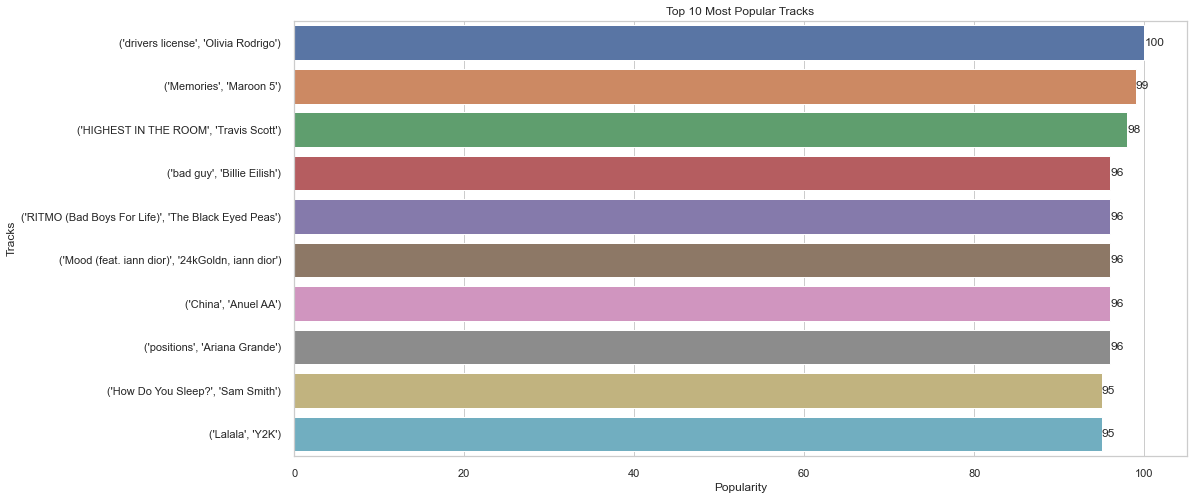

In [59]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
df['name'] = df['name'].astype('U')
df['artist'] = df['artist'].astype('U')
x = df.groupby(["name","artist"])["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x,x.index.values)
ax.set_title('Top 10 Most Popular Tracks')
ax.set_ylabel('Tracks')
ax.set_xlabel('Popularity')
plt.xticks(rotation = 0)

for i in ax.containers:
    ax.bar_label(i,)

X:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


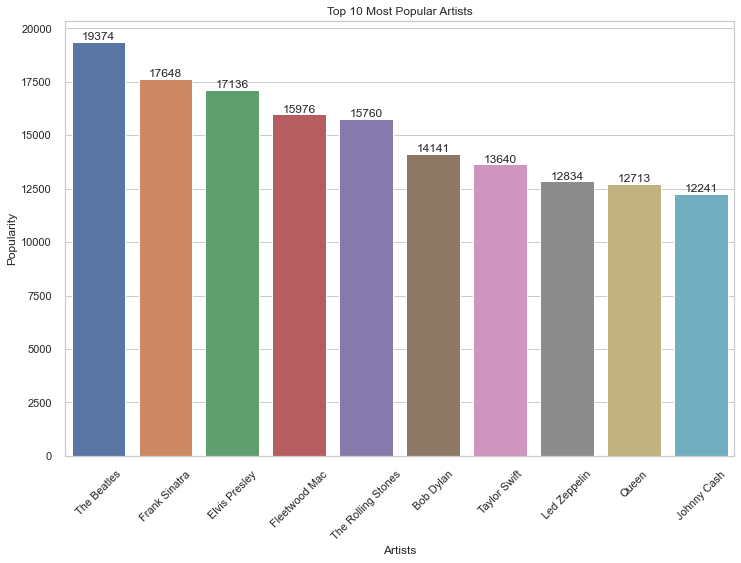

In [60]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
df['artist'] = df['artist'].astype('U')
x = df.groupby("artist")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top 10 Most Popular Artists')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 45)

for i in ax.containers:
    ax.bar_label(i,)

X:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Year')

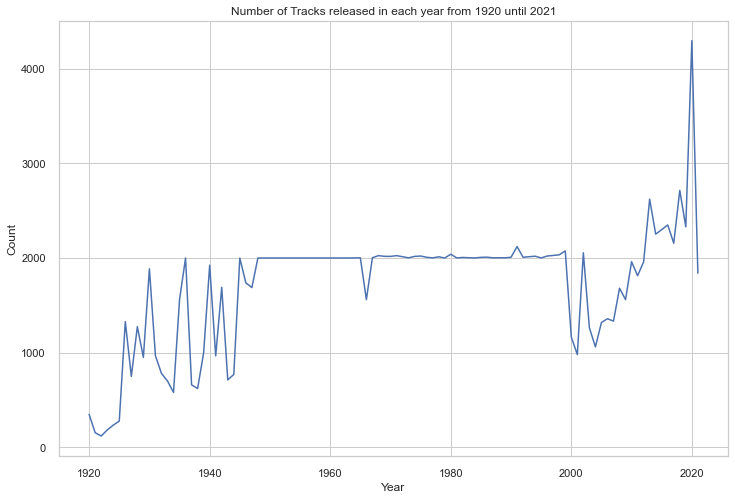

In [61]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
x = second_df.groupby("year")["id"].count()
ax= sns.lineplot(x.index,x)
ax.set_title('Number of Tracks released in each year from 1920 until 2021')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

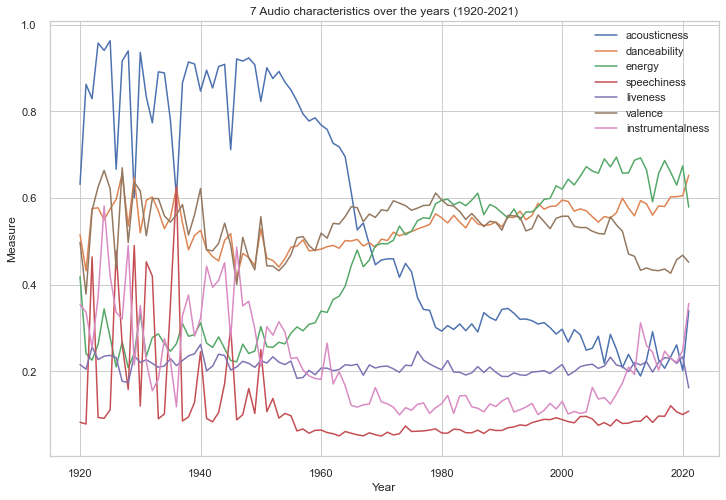

In [62]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence","instrumentalness"]
for col in columns:
    x = second_df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('7 Audio characteristics over the years (1920-2021)')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

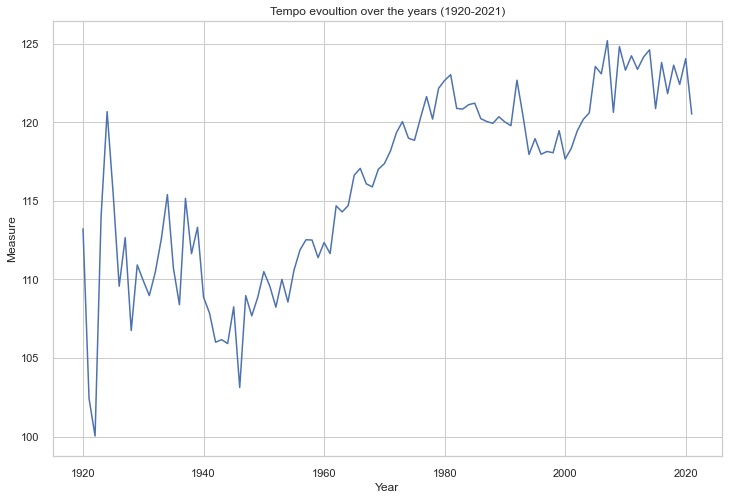

In [63]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
x = second_df.groupby("year")["tempo"].mean()
ax= sns.lineplot(x=x.index,y=x)
ax.set_title('Tempo evoultion over the years (1920-2021)')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

In [64]:
second_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


Text(0.5, 0, 'Year')

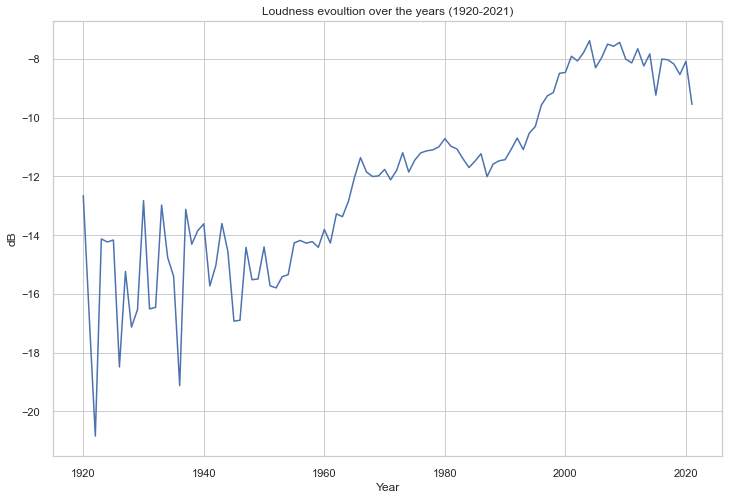

In [65]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
x = second_df.groupby("year")["loudness"].mean()
ax= sns.lineplot(x=x.index,y=x)
ax.set_title('Loudness evoultion over the years (1920-2021)')
ax.set_ylabel('dB')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

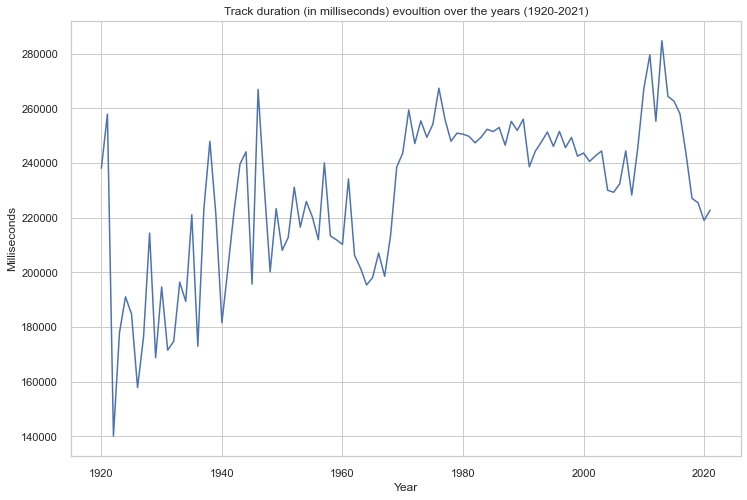

In [66]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
x = second_df.groupby("year")["duration_ms"].mean()
ax= sns.lineplot(x=x.index,y=x)
ax.set_title('Track duration (in milliseconds) evoultion over the years (1920-2021)')
ax.set_ylabel('Milliseconds')
ax.set_xlabel('Year')

X:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
X:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
X:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
X:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)
X:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)
X:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0, flags=flags)


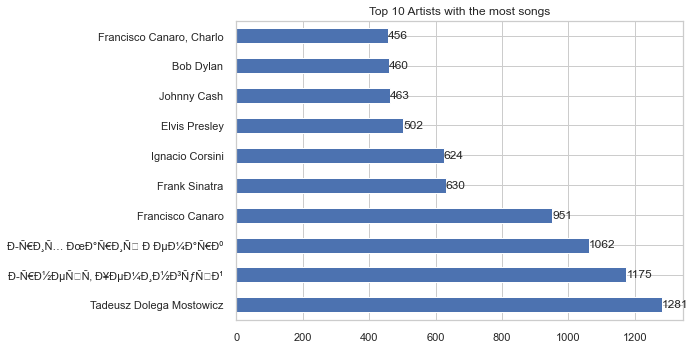

In [67]:
ax = df['artist'].value_counts()[:10].plot(kind='barh',title="Top 10 Artists with the most songs")
for i in ax.containers:
    ax.bar_label(i,)

Text(0, 0.5, '')

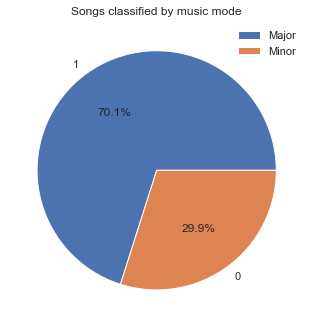

In [68]:
df['mode'].value_counts().plot(kind='pie',autopct='%1.1f%%',title="Songs classified by music mode")
plt.legend(["Major", "Minor"])
plt.ylabel("")

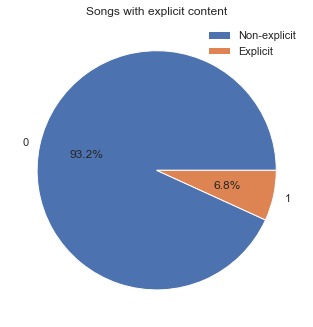

In [69]:
second_df['explicit'].value_counts().plot(kind='pie',autopct='%1.1f%%',title="Songs with explicit content").set(ylabel="")
plt.legend(["Non-explicit", "Explicit"])

[Text(0, 0.5, '')]

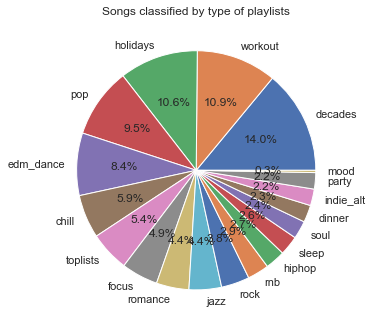

In [70]:
df['label'].value_counts().plot(kind='pie',autopct='%1.1f%%',title="Songs classified by type of playlists").set(ylabel="")

[Text(0, 0.5, '')]

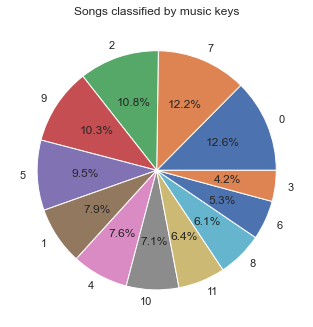

In [71]:
df['key'].value_counts().plot(kind='pie',autopct='%1.1f%%',title="Songs classified by music keys").set(ylabel="")

[Text(0, 0.5, '')]

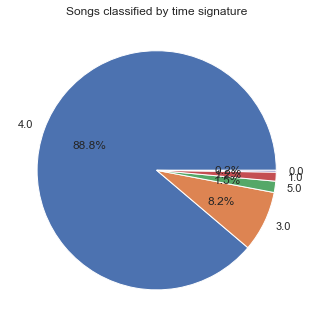

In [72]:
df['time_signature'].value_counts().plot(kind = 'pie', autopct='%1.1f%%',title="Songs classified by time signature").set(ylabel="")

In [73]:
cols = ['artist','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature','label']
non_categorical = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
categorical = ['artist','key','mode','time_signature','label']

# %ms = MinMaxScaler()
df[non_categorical] = df[non_categorical].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# df[non_categorical] = mms.fit_transform(df[non_categorical])
df[non_categorical].head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.773279,0.320,0.826732,0.056231,0.840361,0.00000,0.0822,0.575,0.373784,0.034603
1,0.803644,0.793,0.868828,0.086715,0.012550,0.00000,0.0952,0.677,0.508983,0.033441
2,0.712551,0.225,0.713272,0.102369,0.905622,0.65700,0.1060,0.243,0.492824,0.045091
3,0.628543,0.601,0.851680,0.152420,0.052410,0.00000,0.4600,0.457,0.479391,0.029756
4,0.712551,0.758,0.884238,0.041401,0.233936,0.00144,0.0924,0.534,0.492811,0.039369


In [74]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,180220.000000,10449.000000
mean,26.692831,0.543600,0.484362,5.202769,0.756341,0.701038,0.107617,0.498487,0.196516,0.210134,0.521347,0.480495,0.042600,3.886975
std,22.151032,0.178233,0.273370,3.520112,0.090309,0.457805,0.185159,0.381443,0.334582,0.179789,0.264733,0.124361,0.027165,0.482019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.420040,0.249000,2.000000,0.706726,0.000000,0.036251,0.086245,0.000000,0.099175,0.306000,0.385845,0.030324,4.000000
50%,27.000000,0.554656,0.469000,5.000000,0.771341,1.000000,0.046756,0.512048,0.000493,0.137000,0.532000,0.475871,0.037646,4.000000
75%,43.000000,0.677126,0.714000,8.000000,0.823851,1.000000,0.078167,0.896586,0.246000,0.268000,0.740000,0.554403,0.048661,4.000000
max,100.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


# Data Normalization

In [75]:
corr = df[non_categorical].corr()
corr.style.background_gradient(cmap='coolwarm')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,0.214125,0.265289,0.237006,-0.269696,-0.225758,-0.111259,0.536295,0.007657,-0.101646
energy,0.214125,1.000000,0.779222,-0.107910,-0.753565,-0.191507,0.137337,0.325903,0.266107,0.058350
loudness,0.265289,0.779222,1.000000,-0.204677,-0.552976,-0.335776,0.061855,0.303478,0.219574,0.018054
speechiness,0.237006,-0.107910,-0.204677,1.000000,-0.023602,-0.133374,0.122787,0.053606,-0.031340,-0.097686
acousticness,-0.269696,-0.753565,-0.552976,-0.023602,1.000000,0.233629,-0.032184,-0.168863,-0.223011,-0.086879
instrumentalness,-0.225758,-0.191507,-0.335776,-0.133374,0.233629,1.000000,-0.046074,-0.225411,-0.073518,0.103390
liveness,-0.111259,0.137337,0.061855,0.122787,-0.032184,-0.046074,1.000000,-0.005067,0.009590,0.030265
valence,0.536295,0.325903,0.303478,0.053606,-0.168863,-0.225411,-0.005067,1.000000,0.162480,-0.181782
tempo,0.007657,0.266107,0.219574,-0.031340,-0.223011,-0.073518,0.009590,0.162480,1.000000,-0.009505
duration_ms,-0.101646,0.058350,0.018054,-0.097686,-0.086879,0.103390,0.030265,-0.181782,-0.009505,1.000000


In [76]:
def cluster_plot(new_data):    
    kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0) 
    pred_y = kmeans.fit_predict(new_data)
    t = [30,40,50,60,70,80] #purple stands for cluster 0, yellow for 1, turquoise stands for 2, light blue for 3, green for 4, dark blue for 5 
    label_color = [t[i] for i in pred_y]
    plt.figure(figsize = (7,7))
    plt.scatter(new_data.iloc[:,0],new_data.iloc[:,1], c=label_color, alpha=0.5,cmap='viridis') 
    plt.show()

def silhouette(new_data):
    kmeans = KMeans(random_state=0)
    visualizer = KElbowVisualizer(kmeans, k=(2,11), metric='silhouette', timings=False)
    visualizer.fit(new_data)    
    visualizer.poof()

def elbow(new_data):
    kmeans = KMeans(random_state=0)
    visualizer = KElbowVisualizer(kmeans, k=(2,11), metric='distortion', timings=False)
    visualizer.fit(new_data)    
    visualizer.poof()

def calinski_harabasz(new_data):
    kmeans = KMeans(random_state=0)
    visualizer = KElbowVisualizer(kmeans, k=(2,11), metric='calinski_harabasz', timings=False)
    visualizer.fit(new_data)    
    visualizer.poof()

# PCA ( Principal Component Analysis)

In [77]:
pca = PCA().fit(df[non_categorical])
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance')

X:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


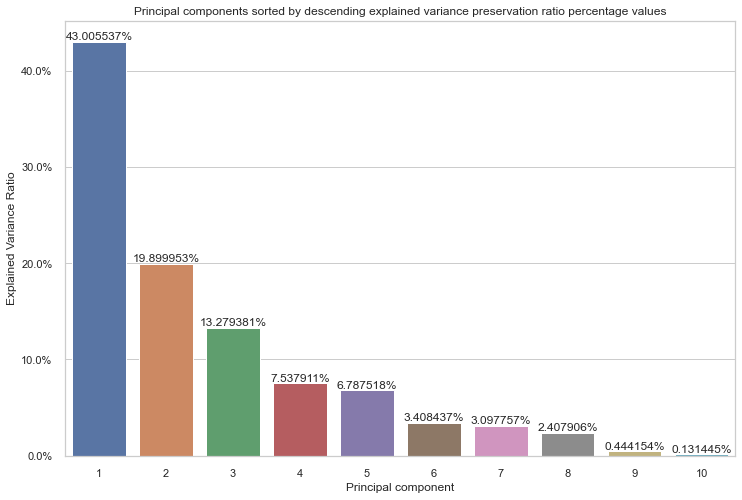

In [78]:
x=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax= sns.barplot(x,pca.explained_variance_ratio_*100)
ax.set_title('Principal components sorted by descending explained variance preservation ratio percentage values')
ax.set_ylabel('Explained Variance Ratio')
ax.set_xlabel('Principal component')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for i in ax.containers:
    ax.bar_label(i,fmt='%.6f%%')

X:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


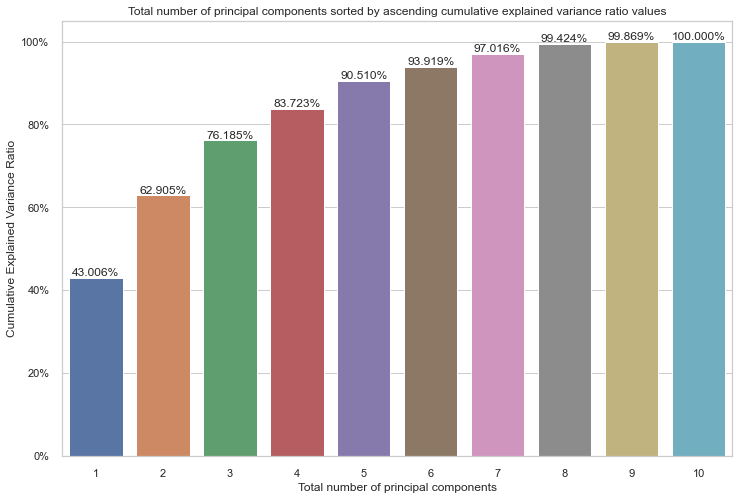

In [79]:
x=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax= sns.barplot(x,np.cumsum(pca.explained_variance_ratio_)*100)
ax.set_title('Total number of principal components sorted by ascending cumulative explained variance ratio values')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_xlabel('Total number of principal components')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for i in ax.containers:
    ax.bar_label(i,fmt='%.3f%%')

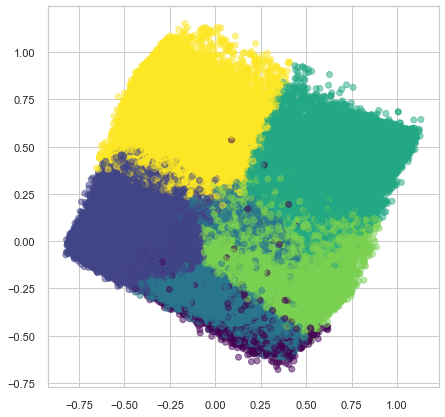

,0,1,2,3,4,5
0,0.219336,-0.366899,0.109372,-0.027259,-0.158634,-0.064744
1,-0.665516,0.002464,0.073776,0.042124,-0.159232,-0.025848
2,0.631077,0.236192,0.078002,0.128903,-0.115649,-0.016956
3,-0.470897,0.019868,-0.197746,0.105639,0.165582,-0.172166
4,-0.438196,-0.026138,-0.030933,-0.059823,-0.136813,0.031592


In [80]:
pca = PCA(6)
data = df.drop_duplicates()
data = pca.fit_transform(data[non_categorical])
cluster_plot(pd.DataFrame(data))
pd.DataFrame(data).head()

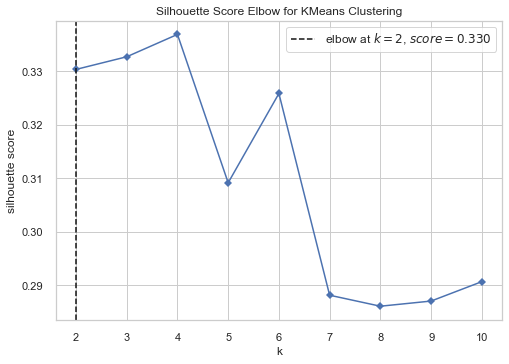

In [81]:
data = pd.DataFrame(data)
silhouette(data)

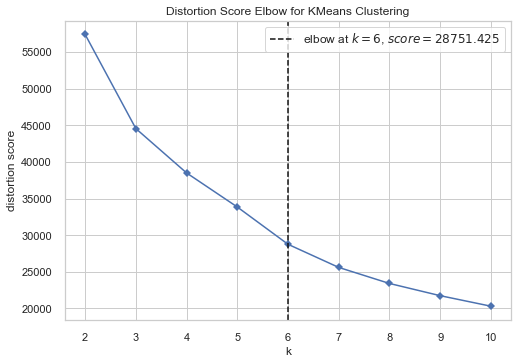

In [82]:
elbow(data)

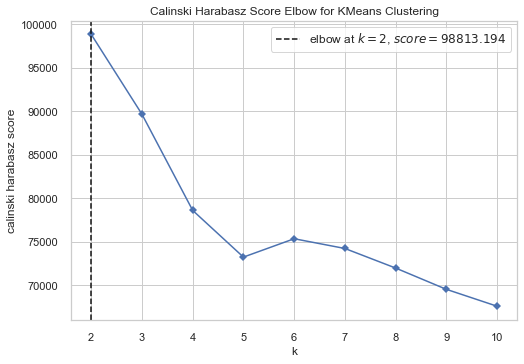

In [83]:
calinski_harabasz(data)

#### From the above graph we can determine that the clustering algorithm requires five clusters

# Model Training

In [85]:
def train(df_train):
    #n = 1
    #for _ in range(n):
        # train_df, test_df = train_test_split(df_train)
    km = KMeans(
            n_clusters=6, init='k-means++',
            n_init=10, max_iter=1000, 
            tol=1e-04, random_state=0
         )
    y_km = km.fit(df_train)
        # km.labels_
        # km.predict(test_df)
    return y_km

def k_mean_distance(center_coordinates, data_coordiantes):
    summ=0
    mag=0
    for i in range(len(center_coordinates)):
        summ+=(center_coordinates[i]-data_coordiantes[i])**2
        mag+=(data_coordiantes[i])**2
    return (summ)**0.5

In [86]:
km = train(data)
data = pd.DataFrame(data)
# pickle.dump(km, open('KMeans_Clustering', 'wb'))
data['label'] = km.labels_
data['artist'] = df.artist
data['name'] = df.name
data['preview'] = df.preview
data['popularity'] = df.popularity
data['type'] = df.label
data['lyrics'] = df.lyrics
data.head()

,0,1,2,3,4,5,label,artist,name,preview,popularity,type,lyrics
0,0.219336,-0.366899,0.109372,-0.027259,-0.158634,-0.064744,2,Maroon 5,Memories,NaN,99,toplists,Here's to the ones that we got\nCheers to the ...
1,-0.665516,0.002464,0.073776,0.042124,-0.159232,-0.025848,1,Dua Lipa,Don't Start Now,https://p.scdn.co/mp3-preview/ed151225213380a4...,95,toplists,"If you don't wanna see me\nDid a full 180, cra..."
2,0.631077,0.236192,0.078002,0.128903,-0.115649,-0.016956,3,Billie Eilish,everything i wanted,NaN,94,toplists,I had a dream\nI got everything I wanted\nNot ...
3,-0.470897,0.019868,-0.197746,0.105639,0.165582,-0.172166,1,Arizona Zervas,ROXANNE,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,88,toplists,All for the 'Gram\nBitches love the 'Gram\nOh ...
4,-0.438196,-0.026138,-0.030933,-0.059823,-0.136813,0.031592,1,Post Malone,Circles,NaN,68,toplists,Paroles de la chanson Circles par Post Malone\...


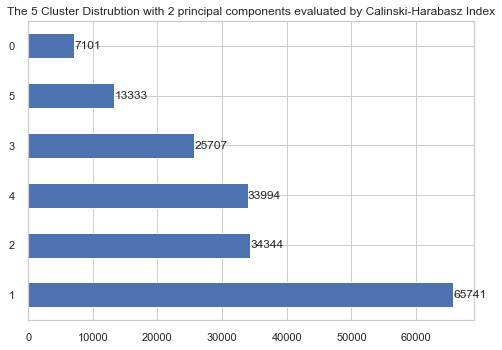

In [87]:
ax = data['label'].value_counts().plot(kind='barh',title="The 5 Cluster Distrubtion with 2 principal components evaluated by Calinski-Harabasz Index")
for i in ax.containers:
    ax.bar_label(i,)

# Generating Outcome

In [88]:
def song_recommendation(song,data):
    arr = []
    dummy_df = data.loc[data['label']==song.label.values[0]]
    for i in range(len(dummy_df.values)):
        if(i>51): break
        dist = k_mean_distance(dummy_df.values[i][0:6],song.values[0][0:6])
        arr.append((
            dummy_df.values[i][9]/(dist+0.00000001)**2, #initial 11
            dist,
            dummy_df.values[i][9],
            dummy_df.values[i][6],
            dummy_df.values[i][7],
            dummy_df.values[i][8],
            dummy_df.values[i][10]
        ))
    arr.sort()
    return arr

def song_print(song):
    print('='*200)
    print('Artist:  ', song.artist.values[0])
    print('Song Name:   ', song.name.values[0])
    print('Type:   ', song['type'].values[0])
    print('Preview link:   ', song.preview.values[0])
    print('='*200)

def recommend_songs(song, data, number_of_recommendations):
        arr = []
        X = data.drop(['label', 'artist', 'name', 'preview', 'type', 'popularity'],axis=1)#,'lyrics'], axis=1)
        Y = data['label']
        X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.2, shuffle=False) #random_state=42)
        knn = KNeighborsClassifier(n_neighbors=25)
        knn.fit(X_train.drop(['lyrics'],axis=1), y_train)
        y_pred = knn.predict(X_test.drop(['lyrics'], axis=1))
        tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
        if song.index.values[0] in X_train.index:
            dummy_df = X_train.loc[y_train == song.label.values[0]].sample(1000)
            lyrics = dummy_df['lyrics']#.loc[y_train == song.label.values[0]]

            print("Song is in Training")
        elif song.index.values[0] in X_test.index:
            #print(X_test.loc[song.index.values[0]])
            dummy_df = X_test.loc[y_pred == song.label.values[0]].sample(1000)
            lyrics = dummy_df['lyrics']#.loc[y_train == song.label.values[0]]
            print(dummy_df.index)
            print("Song is in Testing")
        else:
            print("Out of boundaries")
            return
        lyrics = lyrics.append(song['lyrics'])
        lyrics_matrix = tfidf.fit_transform(lyrics.values.astype('U'))
        cosine_similarities = cosine_similarity(lyrics_matrix)
        array_dist = []
        normalized_popularities = []
        min_popularity = 100
        max_popularity = 0
        for i in range(len(dummy_df.values)):
            dist = k_mean_distance(dummy_df.values[i][0:6], song.values[0][0:6])
            array_dist.append(dist)
            min_popularity = min(min_popularity, data.values[dummy_df.index.values[i]][10])
            max_popularity = max(max_popularity, data.values[dummy_df.index.values[i]][10])
        array_dist_max = max(array_dist)
        array_dist_min = min(array_dist)
        for i in range (len(array_dist)):
            array_dist[i] = 1 - (array_dist[i] - array_dist_min)*2/(array_dist_max - array_dist_min)
            normalized_popularity = - 1 + (data.values[dummy_df.index.values[i]][10] - min_popularity)*2/(max_popularity-min_popularity)
            normalized_popularities.append(normalized_popularity)
        for i in range(len(dummy_df.values)):
            #normalized_popularity = -1 + ()
            #custom_dist = (1 - data.values[dummy_df.index.values[i]][10]/100 + 1 - cosine_similarities[len(cosine_similarities) - 1][i] + array_dist[i])/3
            custom_dist = (normalized_popularities[i] + cosine_similarities[len(cosine_similarities) - 1][i] + array_dist[i])/3
            arr.append((
                    custom_dist,#data.values[dummy_df.index.values[i]][10] + cosine_similarities[len(cosine_similarities) - 1][i])/dist ** 2,
                    #dist,
                     custom_dist,
                    data.values[dummy_df.index.values[i]][10],
                    data.values[dummy_df.index.values[i]][7],
                    data.values[dummy_df.index.values[i]][8],
                    data.values[dummy_df.index.values[i]][9],
                    data.values[dummy_df.index.values[i]][11]
                ))
        arr.sort()
        return arr

In [89]:
song = data.loc[[2980]]
number_of_recommendations = 5
ans = recommend_songs(song,data, number_of_recommendations)
song_print(song)
j=1
for i in ans[::-1]:
    if(j>number_of_recommendations):
        break
    print('Number:  ', j)
    print('Popularity/distance:  ',i[0])
    print('Artist:  ', i[3])
    print('Song Name:   ', i[4])
    print('Type:   ', i[6])
    print('Preview link:   ', i[5])
    print('-'*100)
    j+=1

Song is in Training
Artist:   Cigarettes After Sex
Song Name:    Falling In Love
Type:    decades
Preview link:    https://p.scdn.co/mp3-preview/b99534447943c33a206c56cffb0b63f818aa7e1e?cid=99f699c35c2d4667917d680d9134d27e
Number:   1
Popularity/distance:   0.5823824500192318
Artist:   Olivia Rodrigo
Song Name:    drivers license
Type:    nan
Preview link:    nan
----------------------------------------------------------------------------------------------------
Number:   2
Popularity/distance:   0.5034760354815896
Artist:   Alex & Sierra
Song Name:    Little Do You Know
Type:    decades
Preview link:    https://p.scdn.co/mp3-preview/8ef3d9b2e67d48f3d7f5074a99762c56a959aacc?cid=99f699c35c2d4667917d680d9134d27e
----------------------------------------------------------------------------------------------------
Number:   3
Popularity/distance:   0.47919225024212925
Artist:   Luke Combs
Song Name:    Beautiful Crazy
Type:    romance
Preview link:    https://p.scdn.co/mp3-preview/46f302468

# Model Evaluation

In [90]:
X = data.drop(['label', 'artist', 'name', 'preview', 'type', 'popularity','lyrics'],axis=1)
Y = data['label']

In [91]:
X

,0,1,2,3,4,5
0,0.219336,-0.366899,0.109372,-0.027259,-0.158634,-0.064744
1,-0.665516,0.002464,0.073776,0.042124,-0.159232,-0.025848
2,0.631077,0.236192,0.078002,0.128903,-0.115649,-0.016956
3,-0.470897,0.019868,-0.197746,0.105639,0.165582,-0.172166
4,-0.438196,-0.026138,-0.030933,-0.059823,-0.136813,0.031592
...,...,...,...,...,...,...
180215,0.379883,-0.232113,-0.317608,-0.067729,-0.052635,-0.058586
180216,0.379883,-0.232113,-0.317608,-0.067729,-0.052635,-0.058586
180217,0.379883,-0.232113,-0.317608,-0.067729,-0.052635,-0.058586
180218,0.379883,-0.232113,-0.317608,-0.067729,-0.052635,-0.058586


In [92]:
Y

0         2
1         1
2         3
3         1
4         1
         ..
180215    4
180216    4
180217    4
180218    4
180219    4
Name: label, Length: 180220, dtype: int32

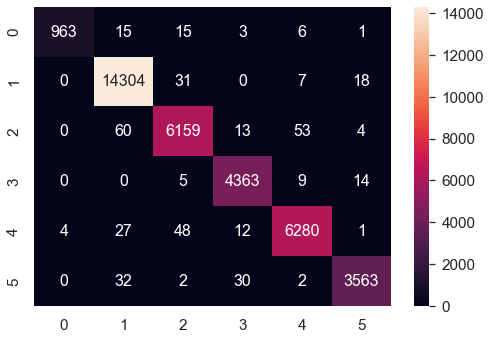

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.2, shuffle=False)
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, range(6), range(6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')  # font size
plt.show()

In [ ]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

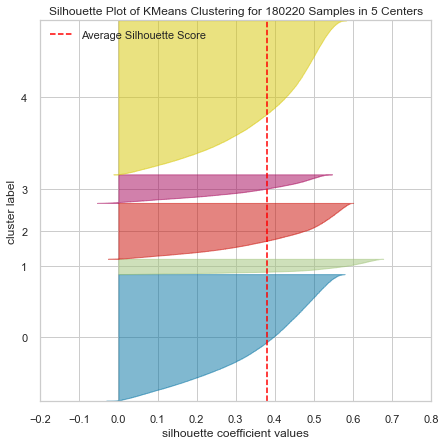

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 180220 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = KMeans(5, random_state=42) #intitial 4
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
plt.figure(figsize = (7,7))
visualizer.fit(data_eval)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure